In [1]:
class Node:
    def __init__(self, feature_idx=None, threshold=None, left=None, right=None, value=None):
        self.feature_idx = feature_idx
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value


In [2]:
import numpy as np


class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.root = None

    def fit(self, X, y):
        self.root = self._build_tree(X, y)

    def predict(self, X):
        return np.array([self._predict(row, self.root) for row in X])

    def _build_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        if depth >= self.max_depth or n_labels == 1 or n_samples == 1:
            leaf_value = np.argmax(np.bincount(y))
            return Node(value=leaf_value)

        feature_idx, threshold = self._best_split(X, y)
        left_X, left_y, right_X, right_y = self._split(X, y, feature_idx, threshold)

        left_child = self._build_tree(left_X, left_y, depth + 1)
        right_child = self._build_tree(right_X, right_y, depth + 1)

        return Node(feature_idx, threshold, left_child, right_child)

    def _predict(self, row, node):
        if node.value is not None:
            return node.value

        if row[node.feature_idx] < node.threshold:
            return self._predict(row, node.left)
        else:
            return self._predict(row, node.right)

    def _best_split(self, X, y):
        m = X.shape[1]
        best_feature, best_threshold = None, None
        best_gain = -1

        for feature_idx in range(m):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                left_X, left_y, right_X, right_y = self._split(X, y, feature_idx, threshold)
                gain = self._information_gain(y, left_y, right_y)

                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature_idx
                    best_threshold = threshold

        return best_feature, best_threshold

    def _split(self, X, y, feature_idx, threshold):
        left_idx = X[:, feature_idx] < threshold
        right_idx = ~left_idx

        left_X, left_y = X[left_idx], y[left_idx]
        right_X, right_y = X[right_idx], y[right_idx]

        return left_X, left_y, right_X, right_y

    def _information_gain(self, y, left_y, right_y):
        parent_entropy = self._entropy(y)
        left_entropy = self._entropy(left_y)
        right_entropy = self._entropy(right_y)

        n = len(y)
        n_left = len(left_y)
        n_right = len(right_y)

        ig = parent_entropy - (n_left / n) * left_entropy - (n_right / n) * right_entropy
        return ig

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log2(p) for p in ps if p > 0])








In [3]:
class RandomForest:
    def __init__(self, n_trees=10, max_depth=None): # no of trees 10
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_trees):
            tree = DecisionTree(self.max_depth)
            idxs = np.random.choice(X.shape[0], X.shape[0], replace=True)
            X_sample, y_sample = X[idxs], y[idxs]
            tree.fit(X_sample, y_sample)
            print("tree",tree)
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.array([np.bincount(pred).argmax() for pred in predictions.T])


In [9]:
# Example usage

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=50, n_features=5, n_classes=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
n_trees=10
rf = RandomForest(n_trees=n_trees, max_depth=5)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(y_pred)
accuracy = np.sum(y_pred)/n_trees
print(accuracy)

tree <__main__.DecisionTree object at 0x000002C1508DDA50>
tree <__main__.DecisionTree object at 0x000002C172A07E10>
tree <__main__.DecisionTree object at 0x000002C172A038D0>
tree <__main__.DecisionTree object at 0x000002C172A010D0>
tree <__main__.DecisionTree object at 0x000002C172A02110>
tree <__main__.DecisionTree object at 0x000002C172A0F650>
tree <__main__.DecisionTree object at 0x000002C172A0F090>
tree <__main__.DecisionTree object at 0x000002C172A0F710>
tree <__main__.DecisionTree object at 0x000002C172A0E950>
tree <__main__.DecisionTree object at 0x000002C172A0D110>
[0 1 1 1 1 1 1 0 0 1]
0.7


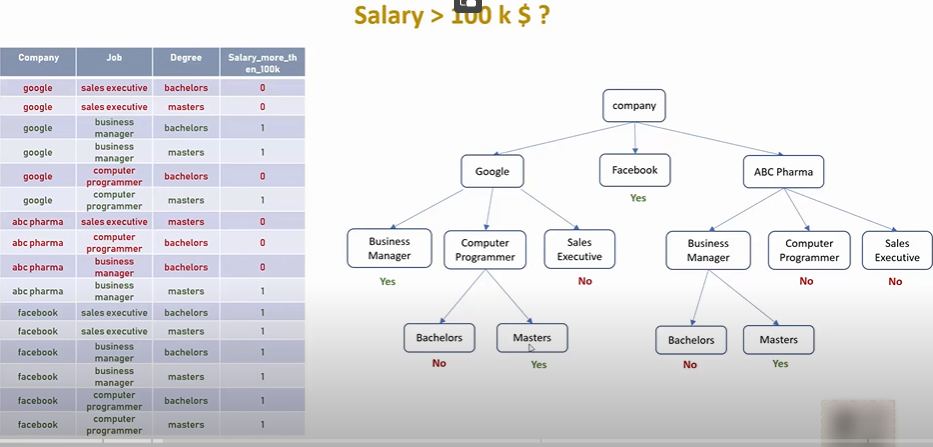

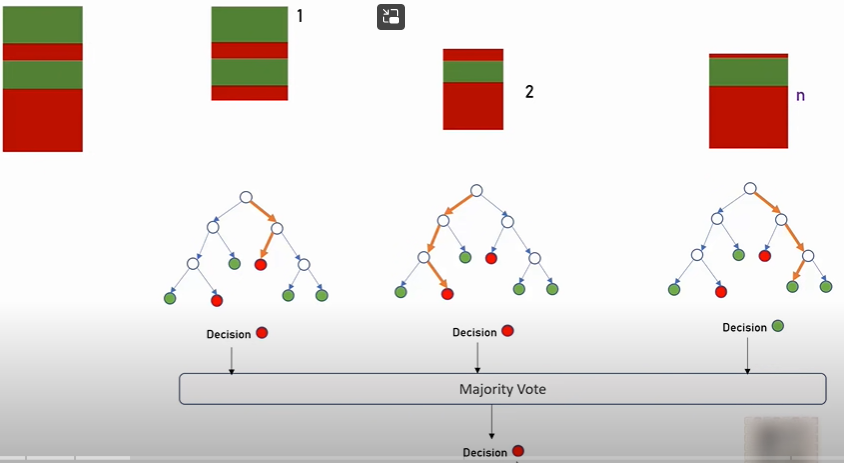

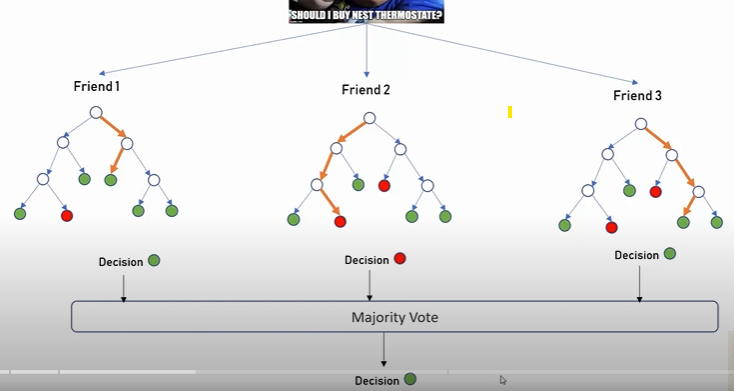

In [1]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
plt.gray()

<Figure size 640x480 with 0 Axes>

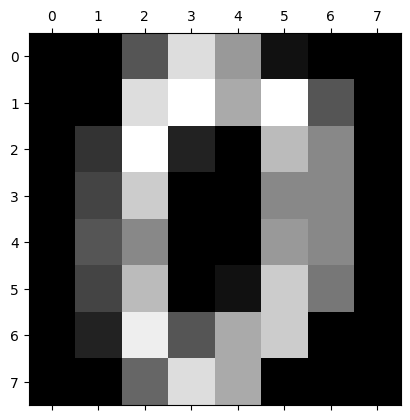

Label: 0


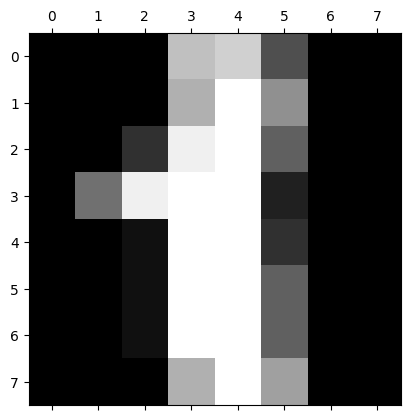

Label: 1


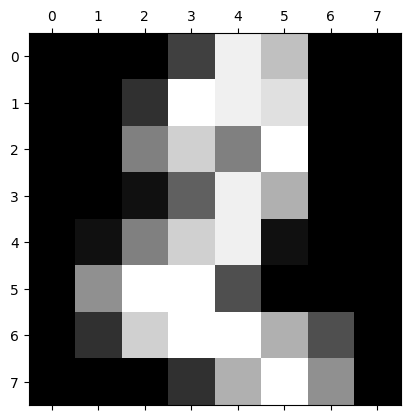

Label: 2


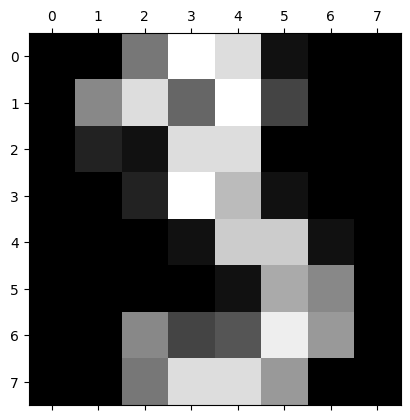

Label: 3


In [5]:
for i in range(4):
    plt.matshow(digits.images[i])
    plt.show()
    print('Label:', digits.target[i])

In [6]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [7]:
df = pd.DataFrame(digits.data)

In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [10]:
df['target'] = digits.target

In [11]:
df[0:12]

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


Train and the model and prediction

In [12]:
X = df.drop('target',axis='columns')
y = df.target

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [16]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20) # 20 no of trees
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [17]:

model.score(X_test, y_test)

0.9472222222222222

In [18]:

y_predicted = model.predict(X_test)

In [19]:
y_predicted

array([5, 5, 1, 0, 9, 3, 1, 5, 6, 3, 6, 8, 2, 5, 4, 4, 1, 0, 2, 4, 8, 1,
       4, 8, 4, 3, 9, 4, 3, 4, 4, 9, 2, 3, 5, 3, 5, 9, 5, 7, 2, 9, 1, 9,
       0, 5, 6, 3, 9, 2, 1, 4, 1, 5, 4, 6, 4, 6, 1, 0, 6, 3, 7, 0, 6, 7,
       1, 2, 1, 1, 9, 7, 0, 5, 3, 9, 3, 9, 5, 3, 7, 6, 3, 1, 0, 1, 7, 2,
       9, 9, 5, 2, 0, 9, 0, 4, 2, 0, 6, 9, 6, 1, 5, 8, 2, 0, 1, 7, 0, 9,
       3, 0, 7, 3, 4, 2, 8, 0, 4, 6, 7, 0, 4, 0, 0, 8, 9, 6, 5, 4, 9, 5,
       3, 9, 5, 0, 3, 3, 7, 6, 3, 3, 5, 4, 0, 6, 2, 3, 1, 8, 9, 1, 9, 1,
       9, 5, 9, 4, 9, 5, 1, 5, 4, 6, 2, 5, 6, 4, 7, 8, 6, 7, 8, 7, 0, 6,
       4, 8, 5, 0, 9, 3, 0, 0, 0, 5, 2, 8, 0, 2, 8, 6, 8, 5, 2, 3, 3, 4,
       7, 1, 2, 7, 7, 5, 3, 2, 7, 2, 2, 8, 7, 1, 4, 1, 7, 3, 1, 2, 5, 7,
       2, 4, 0, 5, 5, 1, 6, 9, 7, 1, 9, 3, 8, 5, 6, 8, 9, 2, 8, 6, 1, 1,
       7, 9, 5, 0, 2, 8, 1, 5, 3, 7, 6, 3, 5, 5, 7, 7, 4, 7, 6, 4, 8, 6,
       5, 9, 4, 9, 2, 0, 3, 3, 3, 5, 5, 2, 1, 3, 2, 8, 9, 0, 8, 1, 1, 7,
       8, 8, 8, 1, 6, 5, 4, 4, 6, 3, 4, 9, 4, 4, 5,

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[31,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 39,  0,  1,  0,  0,  1,  0],
       [ 0,  1,  0,  0, 37,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 41,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 33,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 28,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  2, 28,  1],
       [ 0,  0,  0,  2,  1,  1,  0,  0,  1, 35]])

Text(95.72222222222221, 0.5, 'Actual')

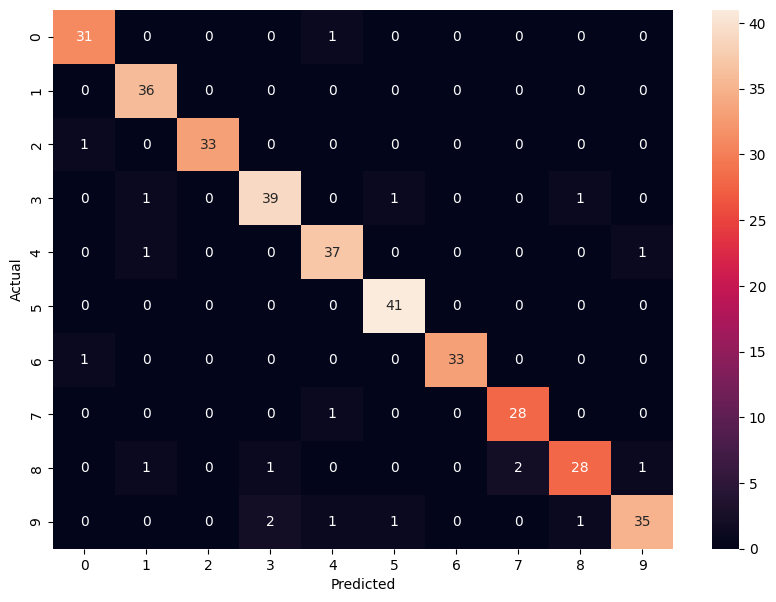

In [22]:
%matplotlib inline

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')